<a href="https://www.kaggle.com/code/vanpatangan/house-prices-using-mi-for-feature-selection?scriptVersionId=219495929" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Data Exploration

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Use list comprehension to iterate over each column
    summary = [[col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns]

    # Create a DataFrame from the list of lists
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    
    # Set pandas option to display all rows
    pd.set_option('display.max_rows', None)
    
    return df_check

In [4]:
check(train)

,column,dtype,instances,unique,sum_null,duplicates
0,Id,int64,1460,1460,0,0
1,MSSubClass,int64,1460,15,0,0
2,MSZoning,object,1460,5,0,0
3,LotFrontage,float64,1201,110,259,0
4,LotArea,int64,1460,1073,0,0
5,Street,object,1460,2,0,0
6,Alley,object,91,2,1369,0
7,LotShape,object,1460,4,0,0
8,LandContour,object,1460,4,0,0
9,Utilities,object,1460,2,0,0


In [5]:
check(test)

,column,dtype,instances,unique,sum_null,duplicates
0,Id,int64,1459,1459,0,0
1,MSSubClass,int64,1459,16,0,0
2,MSZoning,object,1455,5,4,0
3,LotFrontage,float64,1232,115,227,0
4,LotArea,int64,1459,1106,0,0
5,Street,object,1459,2,0,0
6,Alley,object,107,2,1352,0
7,LotShape,object,1459,4,0,0
8,LandContour,object,1459,4,0,0
9,Utilities,object,1457,1,2,0


## Distribution

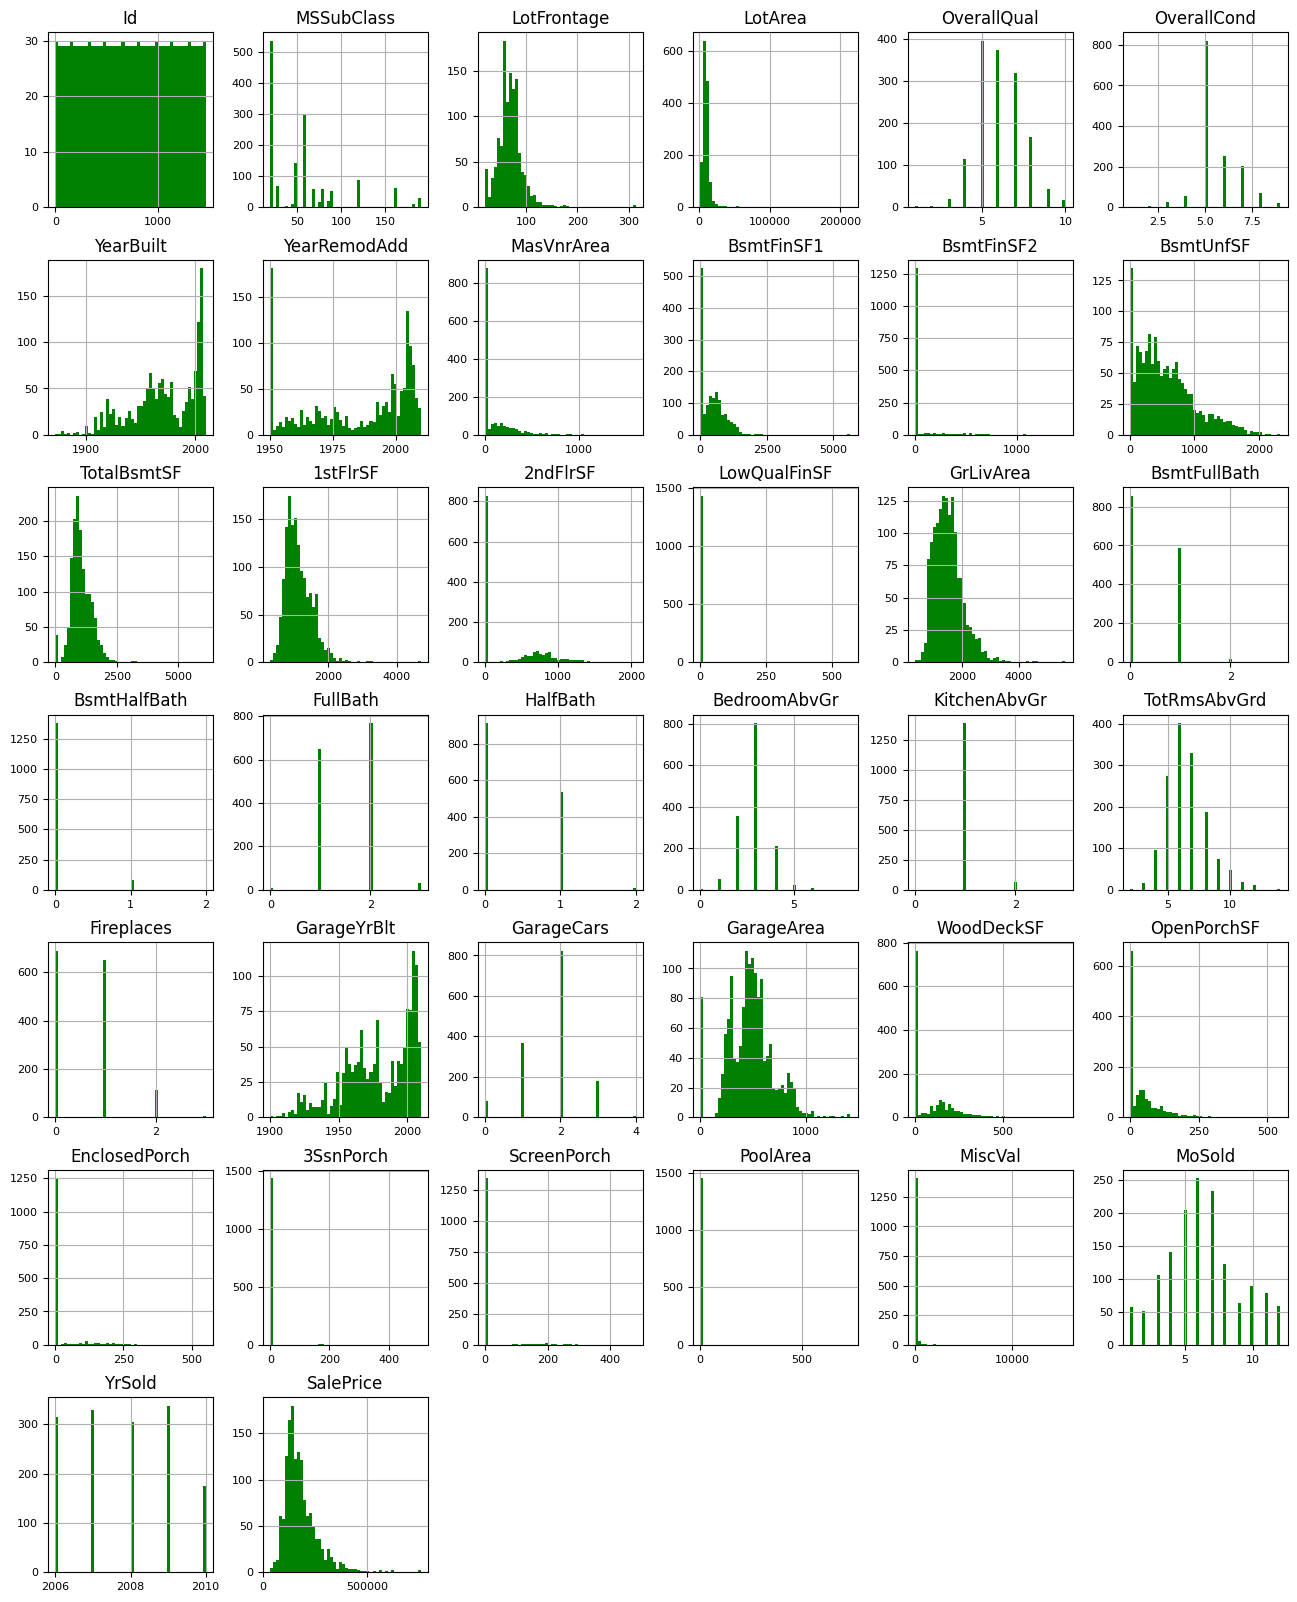

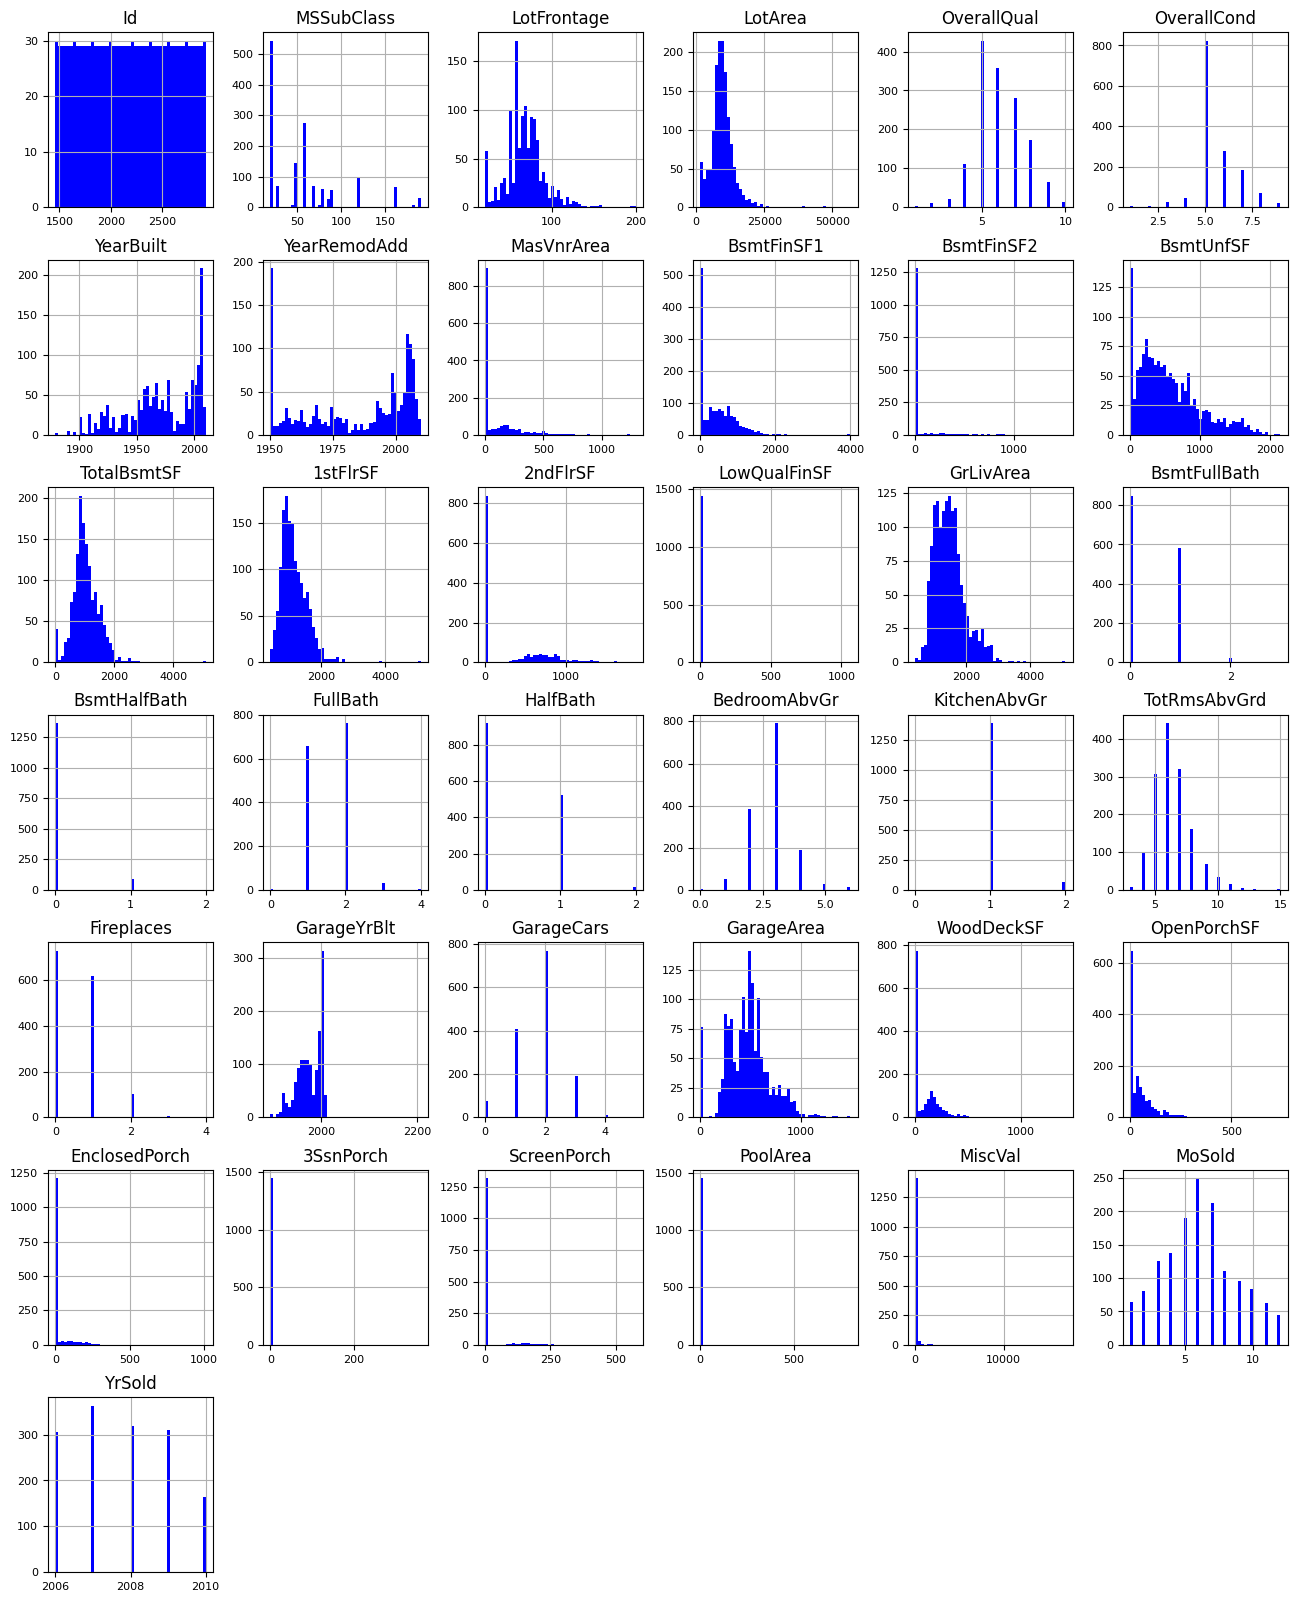

In [6]:
# Find all the Numeric Dtypes 
numeric_col_train = train.select_dtypes(include=['float64','int64'])
numeric_col_test = test.select_dtypes(include=['float64','int64'])

# Visualize to check distribution 
numeric_col_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='g');
numeric_col_test.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='b');

## Missing Values 

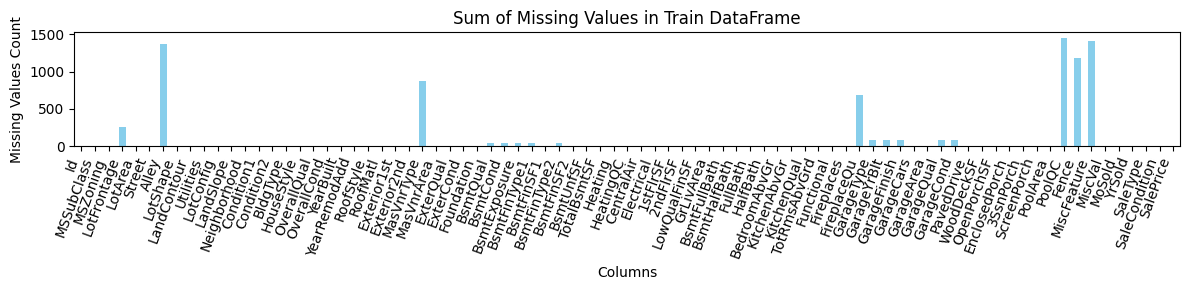

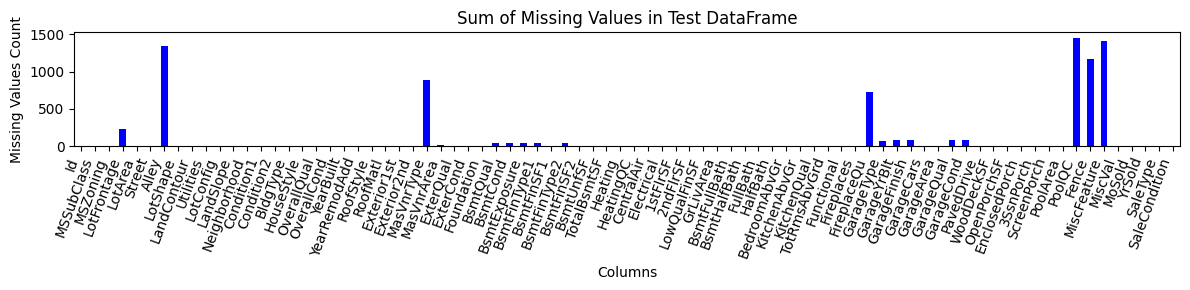

In [7]:
# Find missing values
missing_val_train = train.isnull().sum()
missing_val_test = test.isnull().sum()  

# Plot the sum of missing values for train data
plt.figure(figsize=(12, 3))
missing_val_train.plot(kind='bar', color='skyblue')
plt.title('Sum of Missing Values in Train DataFrame')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

# Plot the sum of missing values for test data
plt.figure(figsize=(12, 3))
missing_val_test.plot(kind='bar', color='blue')
plt.title('Sum of Missing Values in Test DataFrame') 
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()


## Correlation

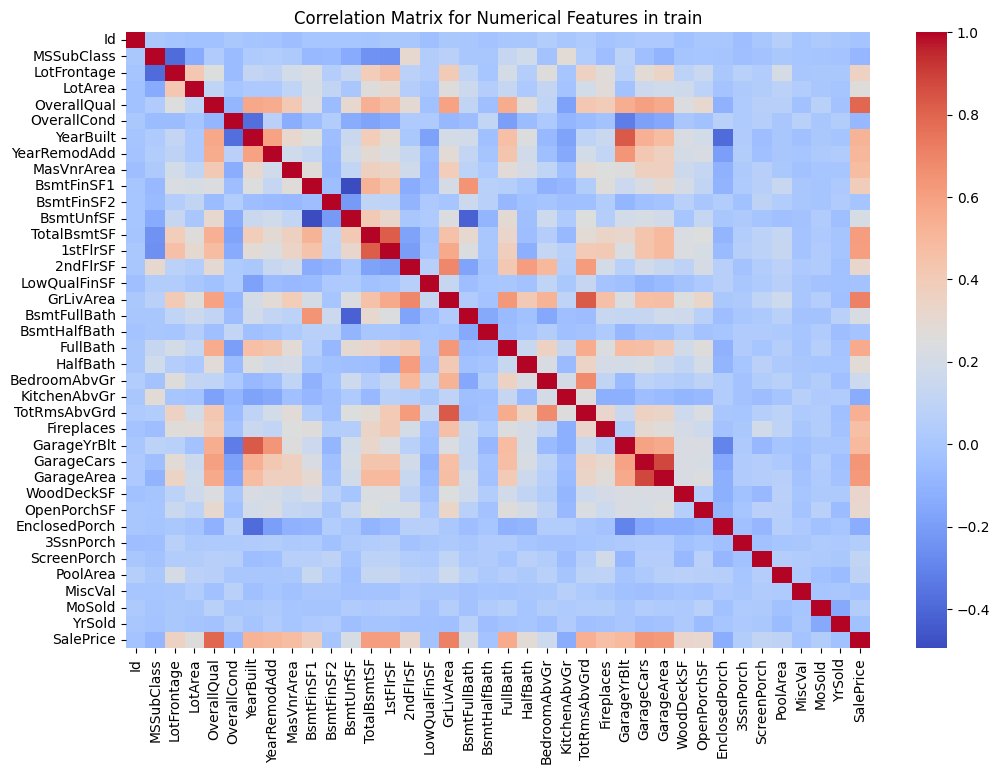

In [8]:
# Specify numerical columns in train
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical features only
corr_matrix = train[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numerical Features in train")
plt.show()

# Handle Missing Values 

In [9]:
def fill_missing_values(df, numerical_features, categorical_features, high_missing_threshold=0.6):
    """
    Fill missing values in both numerical and categorical features.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names.
        high_missing_threshold (float): Threshold for high missing ratio in categorical features.

    Returns:
        pd.DataFrame: The dataframe with missing values filled.
    """
    # Fill numerical features
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

    # Fill categorical features
    for feature in categorical_features:
        missing_ratio = df[feature].isnull().mean()
        if missing_ratio > high_missing_threshold:
            df[feature] = df[feature].notnull().astype(int)
        else:
            df[feature].fillna(df[feature].mode().iloc[0], inplace=True)

    return df


def preprocess_data(train, test, target_variable='SalePrice', drop_na=True):
    """
    Preprocess train and test dataframes.

    Parameters:
        train (pd.DataFrame): The training dataframe.
        test (pd.DataFrame): The testing dataframe.
        target_variable (str): The target variable name in the train dataframe.
        drop_na (bool): Whether to drop rows with NaN values after filling missing values.

    Returns:
        tuple: Preprocessed train and test dataframes.
    """
    # Select features
    numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.drop(target_variable, errors='ignore')
    categorical_features = train.select_dtypes(include=['object', 'category']).columns

    # Fill missing values
    train = fill_missing_values(train, numerical_features, categorical_features)
    test = fill_missing_values(test, numerical_features, categorical_features)

    # Drop rows with any remaining NaN values, if specified
    if drop_na:
        train = train.dropna()
        test = test.dropna()

    # Align dataframes, excluding the target variable
    train_features = train.drop(columns=[target_variable], errors='ignore')
    test_features = test.copy()
    aligned_train, aligned_test = train_features.align(test_features, join='inner', axis=1)

    # Add the target variable back to the train dataframe
    if target_variable in train.columns:
        aligned_train[target_variable] = train[target_variable]

    return aligned_train, aligned_test


# Preprocess the data
train, test = preprocess_data(train, test)

# Feature Selection using MI 

**Mutual information measures the mutual dependence between two variables, indicating how much information one variable provides about another. Specifically, in this analysis, we'll examine the mutual information between the target variable SalePrice and other features in the dataset.**

In [10]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

categorical_features = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    # Combine train and test data for fitting
    combined_data = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_data)
    
    # Transform train and test separately
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    
    label_encoders[col] = le

# Mutual information calculation
features = train.drop(columns=['Id', 'SalePrice'])
target = train['SalePrice']

# Convert all features to numeric
for col in features.columns:
    features[col] = pd.to_numeric(features[col], errors='coerce')

# Fill NaN values with column mean
features = features.fillna(features.mean())

mi_scores = mutual_info_regression(features, target, random_state=42)
mi_scores = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)

print(mi_scores)

OverallQual      0.551839
Neighborhood     0.503182
GrLivArea        0.481898
TotalBsmtSF      0.369674
GarageArea       0.367550
YearBuilt        0.364320
GarageCars       0.359794
ExterQual        0.321553
BsmtQual         0.316749
KitchenQual      0.316426
1stFlrSF         0.309873
GarageYrBlt      0.292070
MSSubClass       0.276014
FullBath         0.263197
YearRemodAdd     0.249784
GarageFinish     0.241636
TotRmsAbvGrd     0.218880
LotFrontage      0.208294
2ndFlrSF         0.202988
Foundation       0.192254
Fireplaces       0.174925
HeatingQC        0.168743
Exterior2nd      0.167746
LotArea          0.159943
OpenPorchSF      0.151952
BsmtFinSF1       0.144245
Exterior1st      0.139236
BsmtFinType1     0.129286
BsmtUnfSF        0.120055
OverallCond      0.114375
MSZoning         0.112807
GarageType       0.108535
WoodDeckSF       0.099662
HalfBath         0.096411
MasVnrArea       0.091974
FireplaceQu      0.087382
LotShape         0.086871
HouseStyle       0.085174
CentralAir  

# Model

In [11]:
# Set a threshold or select top-k features
#threshold = 0.05  # Adjust this based on your dataset
#selected_features = mi_scores[mi_scores > threshold].index

# Alternatively, select top-k features
top_k = 25
selected_features = mi_scores.nlargest(top_k).index

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from scipy.stats import uniform, randint

X = train[selected_features]
y = np.log(train['SalePrice'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for random search
param_dist = {
    "n_estimators": randint(100, 1000),  # Number of trees
    "learning_rate": uniform(0.01, 0.2),  # Learning rate
    "max_depth": randint(3, 10),  # Maximum depth of trees
    "subsample": uniform(0.6, 0.4),  # Fraction of samples used per tree
    "colsample_bytree": uniform(0.6, 0.4),  # Fraction of features used per tree
}

# Define the model
model = XGBRegressor(random_state=42)

# Define RMSE as the evaluation metric
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring=rmse_scorer,  # Use RMSE for evaluation
    cv=5,  # 5-fold cross-validation
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Perform random search
random_search.fit(X, y)

# Best parameters from random search
print("Best parameters:", random_search.best_params_)

# Train the model with the best parameters on the entire training set
best_model = random_search.best_estimator_

# Evaluate on test data
y_pred_log = best_model.predict(X_test)

# Reverse the log transformation
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred_log)

# Evaluation Metrics (log scale)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
mae_log = mean_absolute_error(y_test, y_pred_log)

# Evaluation Metrics (original scale)
rmse_original = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
mae_original = mean_absolute_error(y_test_exp, y_pred_exp)

print("\nMetrics on log scale:")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"MAE (log): {mae_log:.4f}")

print("\nMetrics on original scale:")
print(f"RMSE: ${rmse_original:.2f}")
print(f"MAE: ${mae_original:.2f}")


Best parameters: {'colsample_bytree': 0.7077649335194086, 'learning_rate': 0.05882510444955484, 'max_depth': 5, 'n_estimators': 473, 'subsample': 0.687505687829228}

Metrics on log scale:
RMSE (log): 0.0296
MAE (log): 0.0224

Metrics on original scale:
RMSE: $5188.86
MAE: $3794.22


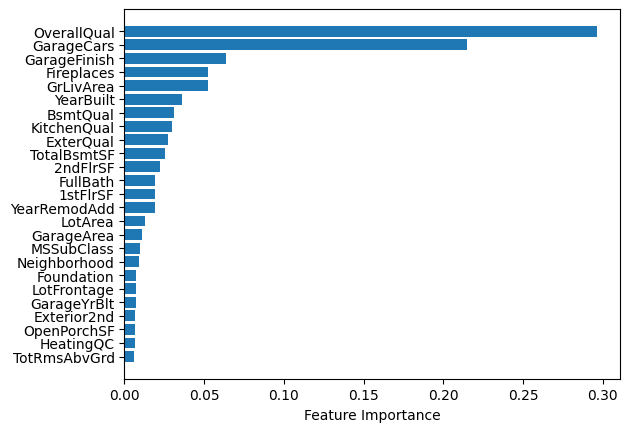

In [13]:
# Plot feature importance
importance = best_model.feature_importances_
sorted_idx = importance.argsort()
plt.barh(X.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

# Predictions and Submission

In [14]:
# Preprocess test data
X_test_final = test[selected_features]

# Ensure all selected features are in the test DataFrame
for col in selected_features:
    if col not in X_test_final.columns:
        X_test_final[col] = 0  # Handle missing columns

# Make predictions
predictions_log = best_model.predict(X_test_final)

# Apply exponential transformation to get actual sale prices
predictions = np.exp(predictions_log)

# Create submission DataFrame
submit_data = pd.DataFrame({
    'Id': test['Id'],  
    "SalePrice": predictions
})

# Save the submission DataFrame to a CSV file
submit_data.to_csv("submission.csv", index=False)

# Display the first few rows of the submission DataFrame
submit_data.head()


,Id,SalePrice
0,1461,135376.234375
1,1462,149296.515625
2,1463,183737.000000
3,1464,180678.250000
4,1465,187819.578125
